**3. [0-5 points] Describe the differences between tSNE and UMAP algorithms in dimensionality reduction, and provide an example (different from those included in the lecture notes) highlighting such differences.**

TSNE and UMAP are two very recent algorithms and they are the most used for any data analysis to do dimensionality reduction. They both are NON-LINEAR algorithms, in which output data are the manifold coordinate representation of the original data in the projected space. 

## **T-SNE (t-distributed stochastic neighbor embedding)**

>AIM: t-sne is based on the idea that very small Euclidean distances between neighboring points are actually reliable. 
T-SNE is an embedding, that **relies on neighbor**. It is **stochastic and it is t-distributed** (where t is the name of distribution of t-student). The focus is a neighbor (points that are mutually close) and the idea is to use a gaussian function to weight the distances between points. The more I go far away from my original point, the more the importance of the distance goes to zero very quickly.

More technically, suppose there are points in a high dimensional space and we want to project them in a low dimensional space using tsne. Given two point $xi$ and $xj$ in the high dimensional space, I want to weight the distance between them with a gaussian function (*p matrix of distances*) and in the arrival space, low dimensional, I will use a t-student distribution instead of the gaussian (*q matrix of distances*). The objective function is minimizing the Kullback-Leibler divergence (function to measure the difference between two distribution): 
If I minimize this function I’m sure to conserve as much as I can the neighbor structure of x when projected into low dimension.
 
**OPTIMIZATION STEP:**

There is a large cost for using widely separated map points to represent nearby data points, but there is only a small cost for using nearby map points to represent widely separated data points. Solution is found by using **gradient descent**, a first order iterative optimization algorithm for finding the minimum of a function. In details, one takes consecutive steps proportional to the negative (opposite) of the gradient (or approximate gradient) that represents the derivative of the optimization function at the current point.
Technically, if we have a function $f: Rp→R$, defined and differentiable in a neighborhood of a point $a$, this function decreases fastest if one goes from a in the direction of the negative gradient of $f$ at $a$, such that  $-∇f(a)=-(∂f/∂x1,…,∂f/∂xp)|a$

Since it is an iterative process, we define the next point $an+1=an-γ∇f(an)$ for a small positive $γ$, then the image of the of the next point has a smaller value of the image of the previous point $f(an+1)≦f(an)$. If start with a guess $x0$ of a local minimum for f and consider the sequence $x0,x1,x2,…$ with $xn+1=xn-γn∇f(xn)$: then we have a monotonic sequence $f(x0) ≧ f(x1) ≧ f(x2) ≧ …$ so that the sequence can converge to the minimum of the function. TSNE OPTIMIZATION strongly repels dissimilar data points that are modeled by a small pairwise distance in the low-dimensional representation and these repulsions do not go to infinity. 

**PERPLEXITY** is the only parameter to set is the variance σi for the high-dim gaussian of pij.No single value of σi can be optimal for all data points in the data set because the density of the data is likely to vary. So usually, in dense regions, a smaller value of σi is usually more appropriate than in sparser regions. Perplexity tells how big is the search space where the optimization of σi should be done for particular dataset. Geometrically, it can be interpreted as a smooth measure, because we have an exponential, of the effective number of neighbors, typical values are between 5 and 50.


## **UMAP (Uniform Manifold Approximation and Projection)**

> UMAP has a large impact on visualization of the dimensionality reduction. This algorithm is totally different from the others, we relay on topology and graph theory. Suppose we have a dataset, to apply the above construction to a dataset, an open cover is needed. If data lie in a metric space (i.e. there exists a distance), the open cover can be obtained by the balls centered in each data point; thus there is a 0-simplex for each data point. Now I used the previous properties, I substitute with the simplices and I reduce my dataset to a simplicial complex. Note that most of the job can be done just considering 0- and 1- simplices (only points and lines): mathematically, this is quivalent to consider the victoris-rips complex instead of the čech complex. So, we obtain a network conserving all the topological properties.

**OPTIMIZATION STEP:**
UMAP adapts the notion of distance on the manifold (stretch) so that all the points seem to be uniformly distributed. By moving to a large dimension, we can stretch the points that are not uniformly distributed into something that is uniformly distributed. This at the cost to have to raise the dimension for my dataset, that gives to each point its own unique concept distance function. Then select balls of radius one with respect to that local distance function.
So the unit ball about a point stretches to the k-th nearest neighbor of the point, where k is the sample size we are using to approximate the local sense of distance (easier in terms of parameters). When constructing balls you have to be sure that in the balls lies k of my neighbors. Given the local metric, we can weight the edges of the graph according to the edge’ vertices distance. Mathematically, we move from the simplicial complexes to the simplicial sets (category theory), which corresponds to move from classical balls to fuzzy balls (associated a concept of fuzziness or undecidability), where ϵ becomes a function in [0,1] decreasing further away from the center. So instead of having a fixed distance, we use a function that decreases (the more you go away from the point, the more the color fades away).Points may end up being separated by the rest of the manifold.
**Local connectivity** is introduced: the fuzziness decays only beyond the nearest neighbor. So the focus is on the difference in distances among nearest neighbors rather than the absolute distance, this allows to avoid the curse of dimensionality, because we are not embedding in that large space.

**Low dimension representation**: to faithfully embed the graph into a low-dim euclidean space so to preserve the original manifold structure can be done by deciding which $f(wh,wl)$ to optimize, where wh,wl are the graph edges’ weights in high and low dimension. Since wh,wl are Bernoulli variables (w exists with prob. p and does not exist with prob. 1-p), the correct function is the cross-entropy.




The cross entropy has two components:
1.     attractive force between points when w is large in high-dimension optimizing clumps
2.     repulsive force between points when w is small in high-dimension: optimizing gaps
 

 
HYPERPARATMETERS (bad aspect of umap):
-        n_neighbors: determines the number of neighboring points used in local approximations of manifold structure. Larger values will result in more global structure being preserved at the loss of detailed local structure. Should often be in the range 5 to 50, with a choice of 10 to 15 being a sensible default.
-        min_dist: controls how tightly the embedding is allowed compress points together. Larger values ensure embedded points are more evenly distributed, while smaller values allow the algorithm to optimise more accurately with regard to local structure. Sensible values [0.001,0.5], with 0.1 being a reasonable default
-        metric: determines the choice of metric used to measure distance in the input space. Wide variety of metrics are already coded a user defined function can be passed. If you said anything, the most natural choice is the Euclidean distance.



**ADVANTAGES AND DISADVANTAGES OF TSNE:**

Advantages of tsne:
- With regard to PCA algorithms, tsne introduced some novelties.
- tsne uses joint instead of conditional probabilities: this introduces symmetry in the problem formulation, and the cost function optimization is computationally much simpler
- uses t-student distribution instead of gaussian modeling on the low-dimensional space: this heavy-tailed distribution in the low-dimensional space alleviates both the crowding problem and the optimization problem. In case of **crowding problem** the heavy-tailed (t-student) distribution instead corrects volume differences between both spaces (that is what is missing when we do PCA for example). t-student distribution instead corrects volume differences between both spaces and allows a moderate distance in the high-dimensional space to be faithfully modeled by a much larger distance in the map and, as a result, it eliminates the unwanted attractive forces between map points that represent moderately dissimilar data points. This is due to the fact that the map’s representation of joint probabilities is (almost) invariant to changes in the scale of the map for map points that are far apart.

Disadvantages of tsne:

- does not output transformation: what you obtain is the projection of your points from the large space to the smallest space, but you don’t obtain a function that does this. There is no way to apply the same transformation, because you don’t have a map that does this, we do not have a function. This is very bad for example for ML (train and test will have different transformations)
- stochastic: it is not deterministic 
- output space hard to interpret as geometrical object, there is no explainability 
- choice of the perplexity hyper parameter is critical 
- views at different perplexities needed to understand topology, to view all the different levels of the dataset you have to set different perplexity levels
- artifacts in data may appear: structure that are not existing in the data may appear if you do not choose the right perplexity
- cluster size and inter-cluster distance is not meaningful, because every output is obtained because of an exaggeration feature.
- slow on large datasets: because the optimization may take much time.

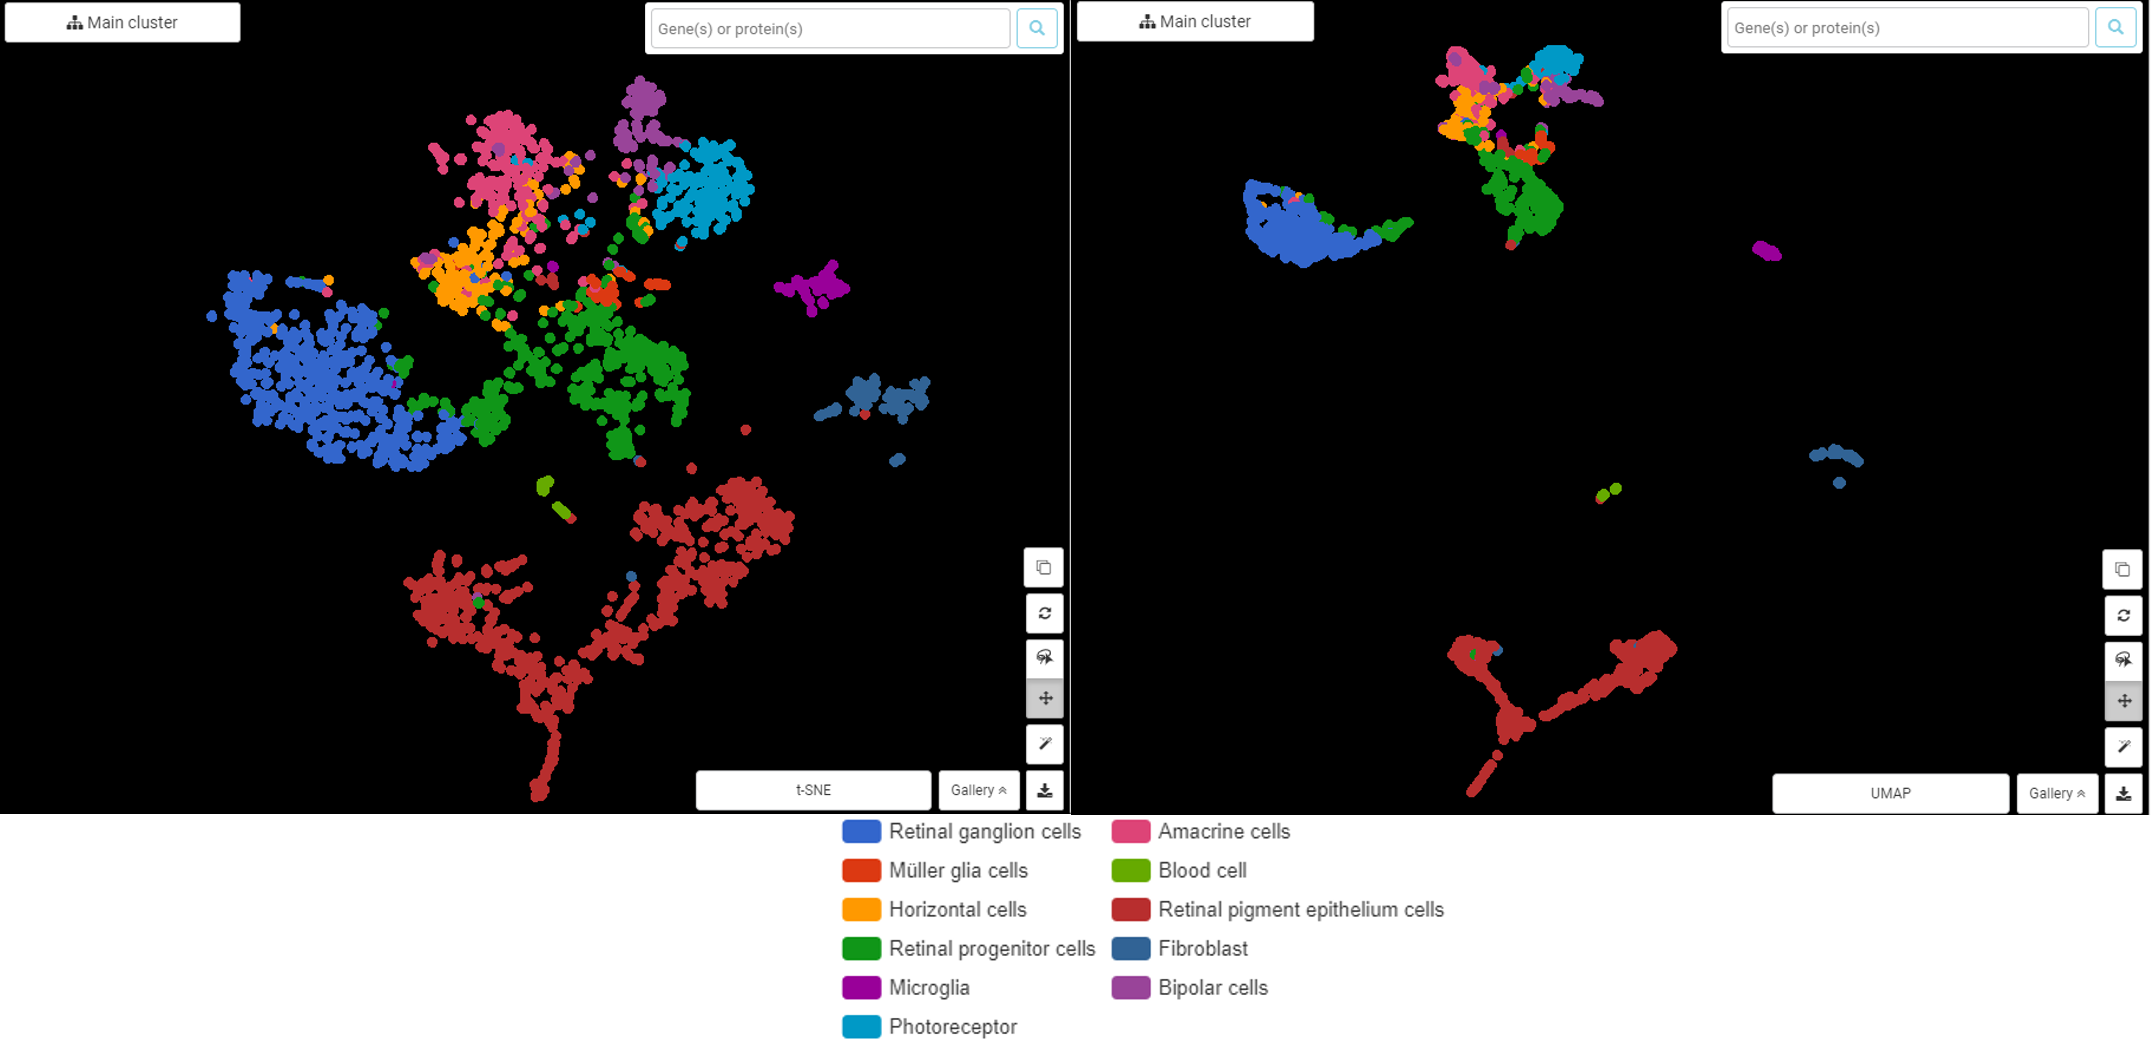

In [2]:
import requests
import IPython.display as Disp
url = "https://blog.bioturing.com/wp-content/uploads/2022/01/umap-vs-tsne-global-structure.png"
Disp.Image(requests.get(url).content)

> In terms of local structure (distances between cells within a cluster and the overall shape of clusters), t-SNE plot  and UMAP are quite similar. However, the global structure shows a clear difference, especially in the relationship between Retinal progenitor cells (green) and Retinal ganglion cells (blue). With t-SNE, the distance from Retinal progenitor cells to every other cluster is quite the same, even though we can see that retinal progenitor cells are slightly closer to cell types that they give rise to (retinal ganglion cells, horizontal cells, amacrine cells, bipolar cells, rod and cone photoreceptor cells, and Müller glia cells). This is one of the common pitfalls that people encounter when reading t-SNE plot, that is, drawing conclusions from t-SNE’s representation of the global structure.  Meanwhile, UMAP gives a nice insight: within Retinal progenitor cells, there can be two subpopulations, one is closely connected to Retinal ganglion cells, the other is clustered with Muller glial cells (light red), Horizontal cells (yellow). In addition, UMAP also draws a clearer separation between Retinal pigment epithelium cells, Fibroblast, and Microglial from the other cell types arise from Retinal progenitor cells  


***Take Away***
* t-SNE and UMAP are both non-linear, graph-based methods for dimensionality reduction in scRNA-seq analysis.
* t-SNE and UMAP are both for data visualization. They are not meant to tell you about clustering or variation as much as methods like PCA do. 
* t-SNE and UMAP have the same principle and workflow: create a high dimensional graph, then reconstruct it in a lower dimensional space while retaining the structure.
* t-SNE moves the high dimensional graph to a lower dimensional space points by points. UMAP compresses that graph.
* Key parameters for t-SNE and UMAP are the perplexity and number of neighbors, respectively. 
* UMAP is more time-saving due to the clever solution in creating a rough estimation of the high dimensional graph instead of measuring every point.
* UMAP gives a better balance between local versus global structure, thus overall gives a more accurate presentation of the global structure. This will come in handy in trajectory analysis. 